# Pattern Recognition-Iris Dataset Classification
**IRIS DATASET 150 records**
Every record has 4 features of datatype float and 1 true class index of datatype integer.

In [1]:
# Pattern Recognition
# Classification of Iris Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request

# Load Iris
class Irisdataset:
    feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
    set_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    
    # trn: number of traning examples
    # 150-trn: number of test examples
    def __init__(self, trn=120):
        # 0<=TR_data<=150
        N = trn
        # Testing samples 150-N
        self._AR = np.zeros((150, 5))
        
        if not os.path.isfile('iris.data'):
            print('Download IRIS dataset')
            urllib.request.urlretrieve(
                "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                "iris.data"
            )
            print('Download complete')

        with open('iris.data', 'r') as f:
            i = 0
            for Line in f:
                line = Line[:-1].split(',')
                line[0] = float(line[0])
                line[1] = float(line[1])
                line[2] = float(line[2])
                line[3] = float(line[3])
                if(line[4] == 'Iris-setosa'):
                    line[4] = 0.0
                elif(line[4] == 'Iris-versicolor'):
                    line[4] = 1.0
                elif(line[4] == 'Iris-virginica'):
                    line[4] = 2.0

                self._AR[i] = np.array(line)
                i += 1
                if i == 150:
                    break
        self._AR = np.random.permutation(self._AR) # random sort
        self.TrainData = self._AR[:N]
        self.TestData = self._AR[N:]

### Linear Classification - Perceptron
One Layer Perceptron with 3 simple neurons,<br>
choice two features for classifier inputs,<br>
Training set: 120 examples<br>
Test set:     30 examples<br>
Final classification error average errors choosing training & test examples 5 times at random.

In [2]:
# Methods
Hot = lambda x:[1 if i==x else -1 for i in range(3)]

In [3]:
learning_rate = 0.7
total_test_error = 0

f0 = 3
f1 = 1
for cnt in range(5):
    iris = Irisdataset(120)  # 120 train data
    train_data = iris.TrainData[:,[f0,f1]]
    train_hot = -1*np.ones((120,3))
    train_hot[range(120),iris.TrainData[:,-1].astype(int)] = 1
    
    test_data = iris.TestData[:,[f0,f1]]
    test_hot = -1*np.ones((30,3))
    test_hot[range(30),iris.TestData[:,-1].astype(int)] = 1
    
    W = np.random.rand(2, 3) # Weights
    B = np.random.rand(1, 3) # Bias
    
    # Training
    # update W, B 200 times or Epochs = 200
    for i in range(200): 
        tr_error = 0
        for tr_d,tr_hot in zip(train_data,train_hot):
            # forward pass
            tr_d = tr_d.reshape(1, 2)
            neurons_outs = np.dot(tr_d, W)+B
            
            # outputs indexis with wrong prediction class
            tr_error+=np.where(neurons_outs*tr_hot<0)[0].size>0
            
            # backward pass
            neurons_outs[np.where(neurons_outs*tr_hot>0)] = 0
            neurons_outs = np.sign(neurons_outs)
            
            # Deltas
            DW = -learning_rate*np.dot(tr_d.T,neurons_outs)
            DB = -learning_rate*neurons_outs
            
            # Update
            W += DW
            B += DB
            
    test_neurons_outs = np.dot(test_data, W)+B
    test_prediction = test_neurons_outs.argmax(1)
    ts_error = sum(test_hot.argmax(1) != test_prediction)
    total_test_error += ts_error
    
    print('Round {0:d}: Test error={1:.2f}'.format(cnt+1, ts_error/30))

print('\nAverage Test error={0:.2f}'.format(total_test_error/(5*30)))

Round 1: Test error=0.07
Round 2: Test error=0.27
Round 3: Test error=0.07
Round 4: Test error=0.13
Round 5: Test error=0.10

Average Test error=0.13


Text(0,0.5,'Sepal width')

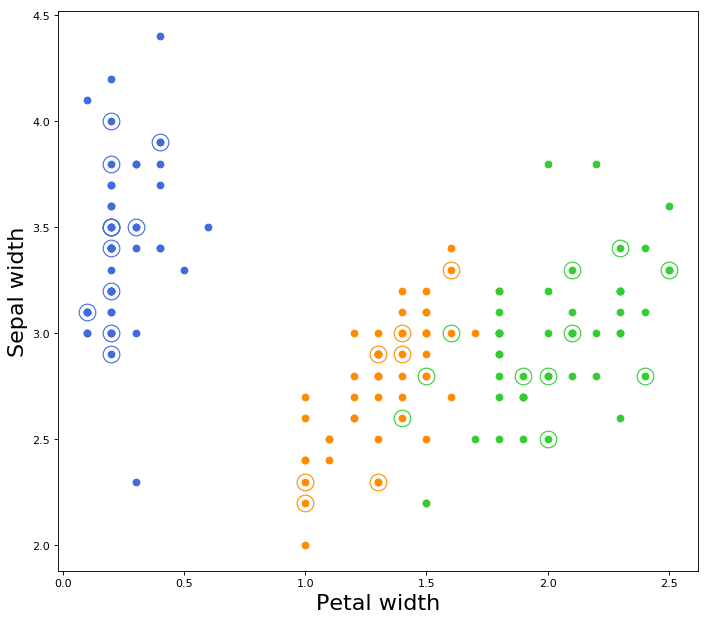

In [4]:
# True labels
c1_tr_train = train_data[np.where(iris.TrainData[:,4] == 0)]
c2_tr_train = train_data[np.where(iris.TrainData[:,4] == 1)]
c3_tr_train = train_data[np.where(iris.TrainData[:,4] == 2)]

c1_tr_test = test_data[np.where(iris.TestData[:,4] == 0)]
c2_tr_test = test_data[np.where(iris.TestData[:,4] == 1)]
c3_tr_test = test_data[np.where(iris.TestData[:,4] == 2)]

# Predicted labels for test examples
c1_pr_test = test_data[test_prediction == 0]
c2_pr_test = test_data[test_prediction == 1]
c3_pr_test = test_data[test_prediction == 2]

fig, ax = plt.subplots(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k' )
fig.subplots_adjust(
    left  = 0,
    right = 1,
    wspace=0.4,
    hspace = 0.2,
    top=1
)

c1_c = 'royalblue'
c2_c = 'darkorange'
c3_c = 'limegreen'

ax.plot(c1_tr_train[:,0],c1_tr_train[:,1],'o',color=c1_c)
ax.plot(c2_tr_train[:,0],c2_tr_train[:,1],'o',color=c2_c)
ax.plot(c3_tr_train[:,0],c3_tr_train[:,1],'o',color=c3_c)

ms_c1 = dict(color=c1_c, marker='o')
ms_c2 = dict(color=c2_c, marker='o')
ms_c3 = dict(color=c3_c, marker='o')

ax.plot(c1_tr_test[:,0],c1_tr_test[:,1],'o', **ms_c1, markersize=15, fillstyle='none')
ax.plot(c2_tr_test[:,0],c2_tr_test[:,1],'o', **ms_c2, markersize=15, fillstyle='none')
ax.plot(c3_tr_test[:,0],c3_tr_test[:,1],'o', **ms_c3, markersize=15, fillstyle='none')


ax.plot(c1_pr_test[:,0],c1_pr_test[:,1],'o', **ms_c1)
ax.plot(c2_pr_test[:,0],c2_pr_test[:,1],'o', **ms_c2)
ax.plot(c3_pr_test[:,0],c3_pr_test[:,1],'o', **ms_c3)

ax.set_xlabel(iris.feature_names[f0], fontsize=20)
ax.set_ylabel(iris.feature_names[f1], fontsize=20)

### Mean Square Error(MSE), leave-one-out cross validation error

Minimize MSE of a linear classifier using normal equation.
Using all features for train & validation.

In [5]:
# Methods
def normal_eq(X,Y):
    W = np.linalg.inv(np.dot(X.T, X))
    W = np.dot(np.dot(W, X.T), Y)
    return W

In [6]:
iris = Irisdataset(150)

def_tr_index = lambda x,n:[False if j==x else True for j in range(n)]
error = 0
S_Examples = iris.TrainData
N = S_Examples.shape[0]

S_Data = S_Examples[:,:-1]
S_Data = np.concatenate((np.ones((N,1)),S_Data),axis=1)
S_Hot = np.zeros((N,3))
S_Hot[range(N),S_Examples[:,-1].astype(int)] = 1
for i in range(N):
    tr_index = np.array(def_tr_index(i,N))

    tr_data = S_Data[tr_index]
    tr_hot = np.array([S_Hot[tr_index] == 1]).reshape(-1,3)
    
    ts_data = S_Data[i].reshape(1,-1)
    ts_hot = np.array([S_Hot[i] == 1]).reshape(-1,3)
    W = normal_eq(tr_data,tr_hot)
    W[0,:]+=0
    ts_pr = np.dot(ts_data,W)
    cl_p = np.sum(ts_pr.argmax()!=ts_hot.argmax())
    error += cl_p
    
print('Test error: {0:.2f}'.format(error/N))

Test error: 0.18


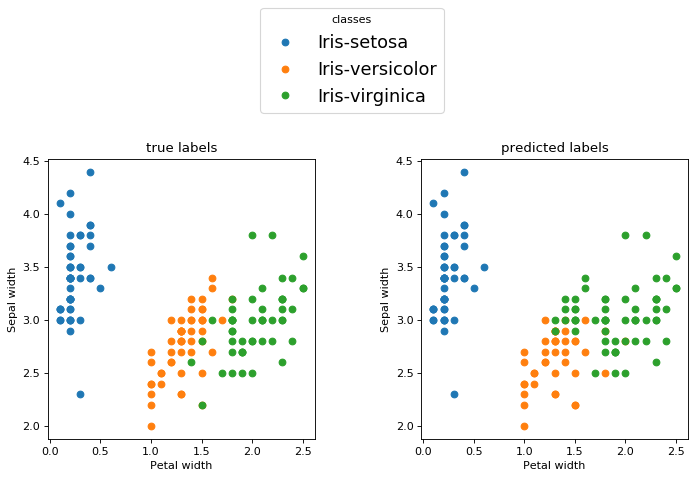

In [7]:
f0 = 3 # first feature 
f1 = 1 # second feature
f1+=1
f0+=1
c1_tr = S_Data[np.where(S_Hot.argmax(1) == 0)]
c2_tr = S_Data[np.where(S_Hot.argmax(1) == 1)]
c3_tr = S_Data[np.where(S_Hot.argmax(1) == 2)]

fig, ax = plt.subplots(ncols=2, figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k' )
fig.subplots_adjust(
    left  = 0,
    right = 1,
    wspace=0.4,
    hspace = 0.2,
    top=1
)

ax[0].plot(
        c1_tr[:,f0],c1_tr[:,f1],'o',
        c2_tr[:,f0],c2_tr[:,f1],'o',
        c3_tr[:,f0],c3_tr[:,f1],'o'
)

ax[0].set_title('true labels')
ax[0].set_xlabel(iris.feature_names[f0-1])
ax[0].set_ylabel(iris.feature_names[f1-1])

pr_d = S_Data.dot(W) 
pl1 = S_Data[np.where(pr_d.argmax(1)== 0)[0]][:,[f0,f1]]
pl2 = S_Data[np.where(pr_d.argmax(1) == 1)[0]][:,[f0,f1]]
pl3 = S_Data[np.where(pr_d.argmax(1) == 2)[0]][:,[f0,f1]]

sc1, sc2, sc3 = ax[1].plot(
                        pl1[:,0],pl1[:,1],'o',
                        pl2[:,0],pl2[:,1],'o',
                        pl3[:,0],pl3[:,1],'o'
                    )
ax[1].set_title('predicted labels')
ax[1].set_xlabel(iris.feature_names[f0-1])
ax[1].set_ylabel(iris.feature_names[f1-1])

fig.legend((sc1, sc2, sc3),
           tuple(iris.set_names),
           'upper center',
           fontsize=16,
           title='classes',
           bbox_to_anchor=[0.55, 1.5]
);

### Naive Bayes classifier, leave-one-out cross validation
* hypothesis 1: all features are independent and following the normal distribution 
* hypothesis 2: all fatures follow 4D normal distribution 

In [8]:
# Methods
Normal_dist = lambda x,avg, std: 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-avg)**2/(2*std**2))

ND_mahalanobis = lambda x,mean,S: np.dot(np.dot((x-mean).T,np.linalg.inv(S)),(x-mean))**(1/2)

def ND_normal_dist(x,mean,S):
    m_dist = ND_mahalanobis(x, mean, S)
    constant = 1/((2*np.pi)**(4/2)*np.linalg.det(S)**(1/2))
    return constant*np.exp(-1/2*np.square(m_dist))

In [9]:
iris = Irisdataset(150) # all dataset

error_h1=0 # hypothesis_1 error
error_h2=0 # hypothesis_2 error

def_tr_index = lambda x:[False if j==x else True for j in range(150)]
for i in range(150):
    
    tr_index = np.array(def_tr_index(i))
    tr_data = iris.TrainData[tr_index]
    # get i_th record for validation
    vl_data = iris.TrainData[i]
    
    
    # Estimate maximum likelihood per feature
    # AVG - STD
    # Setosa
    tr_setosa = tr_data[np.where(tr_data[:,4] == 0)][:,:4]
    tr_setosa_avg_per_feature = np.mean(tr_setosa,axis=0)
    tr_setosa_std_per_feature = np.std(tr_setosa, axis=0)

    # Versicolor
    tr_versicolor = tr_data[np.where(tr_data[:,4] == 1)][:,:4]
    tr_versicolor_avg_per_feature = np.mean(tr_versicolor, axis=0)
    tr_versicolor_std_per_feature = np.std(tr_versicolor, axis=0)

    # Virginica
    tr_virginica = tr_data[np.where(tr_data[:,4] == 2)][:,:4]
    tr_virginica_avg_per_feature = np.mean(tr_virginica, axis=0)
    tr_virginica_std_per_feature = np.std(tr_virginica, axis=0)
    
    
    # hypothesis 1 START
    # Test Model
    # class confidence per feature
    h1_conf_setosa = Normal_dist(vl_data[:-1], tr_setosa_avg_per_feature, tr_setosa_std_per_feature)
    h1_conf_versicolor = Normal_dist(vl_data[:-1], tr_versicolor_avg_per_feature, tr_versicolor_std_per_feature)
    h1_conf_virginica = Normal_dist(vl_data[:-1], tr_virginica_avg_per_feature, tr_virginica_std_per_feature)
    
    # prediction_class
    arg_max_class_conf_per_feature = np.argmax([
            h1_conf_setosa,
            h1_conf_versicolor,
            h1_conf_virginica      
        ], axis=0)
    counts = np.bincount(arg_max_class_conf_per_feature)
    h1_prediction_class = np.argmax(counts)
    
    # add 1 if true_class != prediction_class
    error_h1 += h1_prediction_class != vl_data[-1]
    # hypothesis 1 END
    
    # hypothesis 2 START
    # calculate converance by class
    tr_setosa_cov = np.cov((tr_setosa).T)
    tr_versicolor_cov = np.cov((tr_versicolor).T)
    tr_virginica_cov = np.cov((tr_virginica).T)
    
    # class confidence 
    h2_conf_setosa = ND_normal_dist(vl_data[:-1].reshape(4,1),tr_setosa_avg_per_feature.reshape(4,1),tr_setosa_cov)
    h2_conf_versicolor = ND_normal_dist(vl_data[:-1].reshape(4,1),tr_versicolor_avg_per_feature.reshape(4,1),tr_versicolor_cov)
    h2_conf_virginica = ND_normal_dist(vl_data[:-1].reshape(4,1),tr_virginica_avg_per_feature.reshape(4,1),tr_virginica_cov)
    
    h2_prediction_class = np.argmax([h2_conf_setosa, h2_conf_versicolor, h2_conf_virginica])
    
    # add 1 if true_class != prediction_class 
    error_h2 += h2_prediction_class != vl_data[-1]
    # hypothesis 2 END
    
print(error_h1/150)
print(error_h2/150)

0.1
0.02666666666666667


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


Text(0.5,1,'Hypothesis_2 Classifiers magnitude')

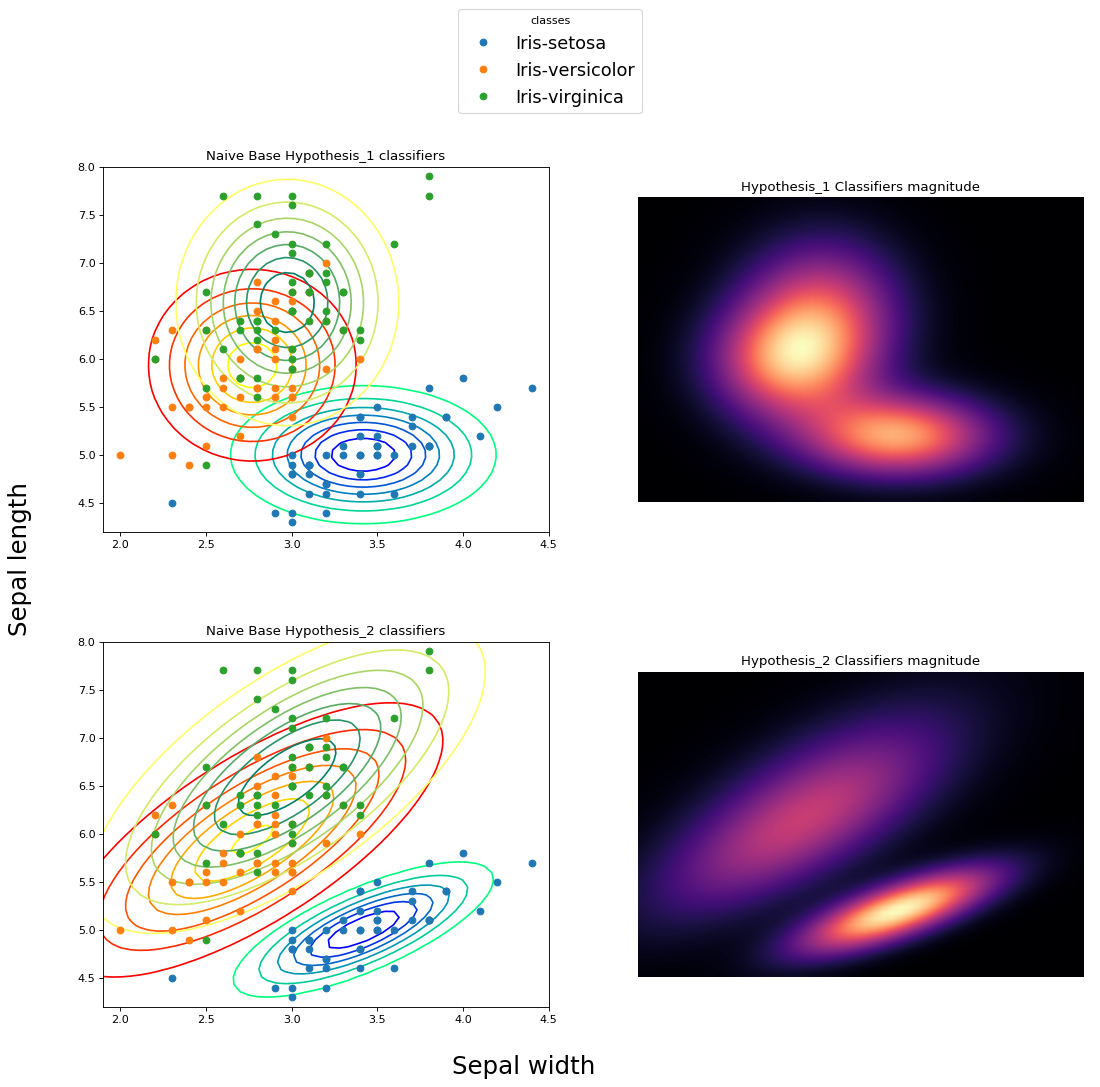

In [10]:
import matplotlib.mlab as mlab
f0 = 0
f1 = 1
min_x = min(iris.TrainData[:,f0])-0.1
max_x = max(iris.TrainData[:,f0])+0.1
min_y = min(iris.TrainData[:,f1])-0.1
max_y = max(iris.TrainData[:,f1])+0.1
cmap = plt.cm.magma
y = np.linspace(min_x, max_x)
x = np.linspace(min_y, max_y)

X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(2,2, figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k' )

for i in range(2):
    sc1, sc2, sc3 = ax[i,0].plot(
        tr_setosa[:,f1],tr_setosa[:,f0],'o',
        tr_versicolor[:,f1],tr_versicolor[:,f0],'o',
        tr_virginica[:,f1],tr_virginica[:,f0],'o'
    )

fig.legend((sc1, sc2, sc3),
           tuple(iris.set_names),
           'upper center',
           fontsize=16,
           title='classes',
          );

fig.text(0.5, 0.04, Irisdataset.feature_names[f1], ha='center',fontsize=22)
fig.text(0.04, 0.5, Irisdataset.feature_names[f0], va='center', rotation='vertical',fontsize=22)

left  = 0.125
right = 1
bottom = 0.1
top = 0.85
wspace = 0.2
hspace = 0.3

fig.subplots_adjust(
    left  = left,
    right = right,
    bottom =bottom,
    top = top,
    wspace = wspace,
    hspace = hspace
)

# hypothesis 1
var_set = tr_setosa_std_per_feature[[f0,f1]]
avg_set = tr_setosa_avg_per_feature[[f0,f1]]
Z_set = mlab.bivariate_normal(X, Y, var_set[1], var_set[0], avg_set[1], avg_set[0])

var_ver = tr_versicolor_std_per_feature[[f0,f1]]
avg_ver = tr_versicolor_avg_per_feature[[f0,f1]]
Z_ver = mlab.bivariate_normal(X, Y, var_ver[1], var_ver[0], avg_ver[1], avg_ver[0])

var_vir = tr_virginica_std_per_feature[[f0,f1]]
avg_vir = tr_virginica_avg_per_feature[[f0,f1]]
Z_vir = mlab.bivariate_normal(X, Y, var_vir[1], var_vir[0], avg_vir[1], avg_vir[0])
Z = Z_set+Z_ver+Z_vir

ax[0,0].contour(X, Y, Z_set,cmap = plt.cm.winter_r)
ax[0,0].contour(X, Y, Z_ver,cmap = plt.cm.autumn)
ax[0,0].contour(X, Y, Z_vir,cmap = plt.cm.summer_r)
ax[0,0].set_title('Naive Base Hypothesis_1 classifiers')

ax[0,1].axis('off')
ax[0,1].imshow(Z, interpolation='bilinear', cmap=cmap,
                origin='lower', extent=[min_x, max_x, min_y, max_y],
                )

ax[0,1].set_title('Hypothesis_1 Classifiers magnitude')

# hypothesis 2
cov_set = np.cov((tr_setosa[:,[f0,f1]]).T).flatten()
cov_set[[0,-1]] = cov_set[[0,-1]]**(1/2)
Z_set_cov = mlab.bivariate_normal(X, Y, cov_set[-1], cov_set[0], avg_set[1], avg_set[0],cov_set[1])

cov_ver = np.cov((tr_versicolor[:,[f0,f1]]).T).flatten()**(1/2)
cov_ver[[0,-1]] = cov_ver[[0,-1]]**(1/2)
Z_ver_cov = mlab.bivariate_normal(X, Y, cov_ver[-1], cov_ver[0], avg_ver[1], avg_ver[0],cov_ver[1])

cov_vir = np.cov((tr_virginica[:,[f0,f1]]).T).flatten()**(1/2)
cov_vir[[0,-1]] = cov_vir[[0,-1]]**(1/2)
Z_vir_cov = mlab.bivariate_normal(X, Y, cov_vir[-1], cov_vir[0], avg_vir[1], avg_vir[0],cov_vir[1])

ax[1,0].contour(X, Y, Z_set_cov,cmap = plt.cm.winter_r)
ax[1,0].contour(X, Y, Z_ver_cov,cmap = plt.cm.autumn)
ax[1,0].contour(X, Y, Z_vir_cov,cmap = plt.cm.summer_r)


Z_cov = Z_set_cov+Z_ver_cov+Z_vir_cov
ax[1,1].axis('off')
ax[1,1].imshow(Z_cov, interpolation='bilinear', cmap=cmap,
                origin='lower', extent=[min_x, max_x, min_y, max_y],
                )

ax[1,0].set_title('Naive Base Hypothesis_2 classifiers')
ax[1,1].set_title('Hypothesis_2 Classifiers magnitude')